## Nomor 1 : Klasifikasi Data

In [1]:
# import package yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics


import warnings
warnings.filterwarnings("default")


In [2]:
# https://www.statology.org/seaborn-barplot-show-values/
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.2f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# normalisasi
def min_max_scaler(df):
    for column in df.columns:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
    return (df)

In [8]:
# Prepocessing data

# read data
df_heart = pd.read_csv(r"D:\UIN\BigData\UAS\dataset\heart.csv")
print('jumlah data =',len(df_heart['HeartDisease']))
print('jumlah kolom =',len(df_heart.columns))
print('null =\n', df_heart.isnull().sum())
print('dtpes =\n',df_heart.dtypes)
print(df_heart.head)

jumlah data = 918
jumlah kolom = 12
null =
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
dtpes =
 Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


numeric data:
'Age' = umur
'RestingBP' = 
'Cholesterol' = angka kolesterol
'MaxHR'= Max HeartRate
'Oldpeak' = 

boolean/two valued data:
'Sex' = Gender
'FastingBS' = FastingBloodPressure (Percepatan Tekanan Darah)
'ExerciseAngina' = 
    Angina is pain in the chest that comes on with exercise, stress, or other things that make the heart work harder. 
    It is an extremely common symptom of coronary artery disease, which is caused by cholesterol-clogged coronary arteries.
'HeartDisease' = PenyakitJantung

categorical data:
'ChestPainType' = ['ATA' 'NAP' 'ASY' 'TA']
'RestingECG' = ['Normal' 'ST' 'LVH']
'ST_Slope' = ['Up' 'Flat' 'Down']

#### a. Buatlah EDA menggunakan teknik visualisasi data. Kemudian jelaskan hasil dari EDA tersebut.

<ipython-input-81-43ab452af603>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_heart.hist(ax = ax, column = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>],
       [<AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'MaxHR'}>],
       [<AxesSubplot:title={'center':'Oldpeak'}>, <AxesSubplot:>]],
      dtype=object)

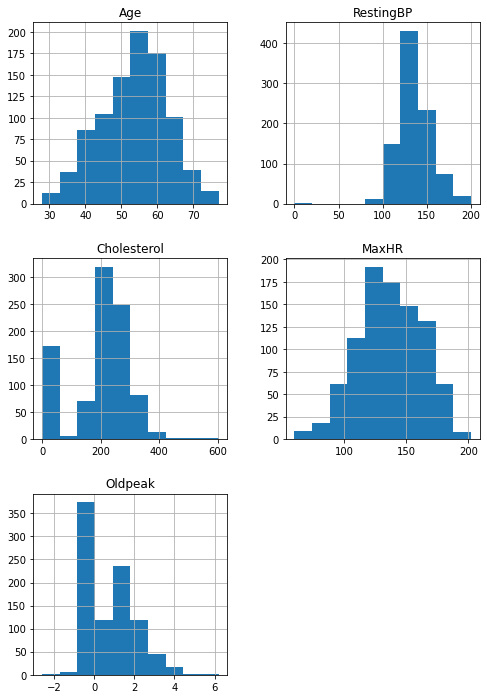

In [81]:
# barplot
# Histogram : untuk melihat persebaran data numerik
fig = plt.figure(figsize = (8,12))
ax = fig.gca()
df_heart.hist(ax = ax, column = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


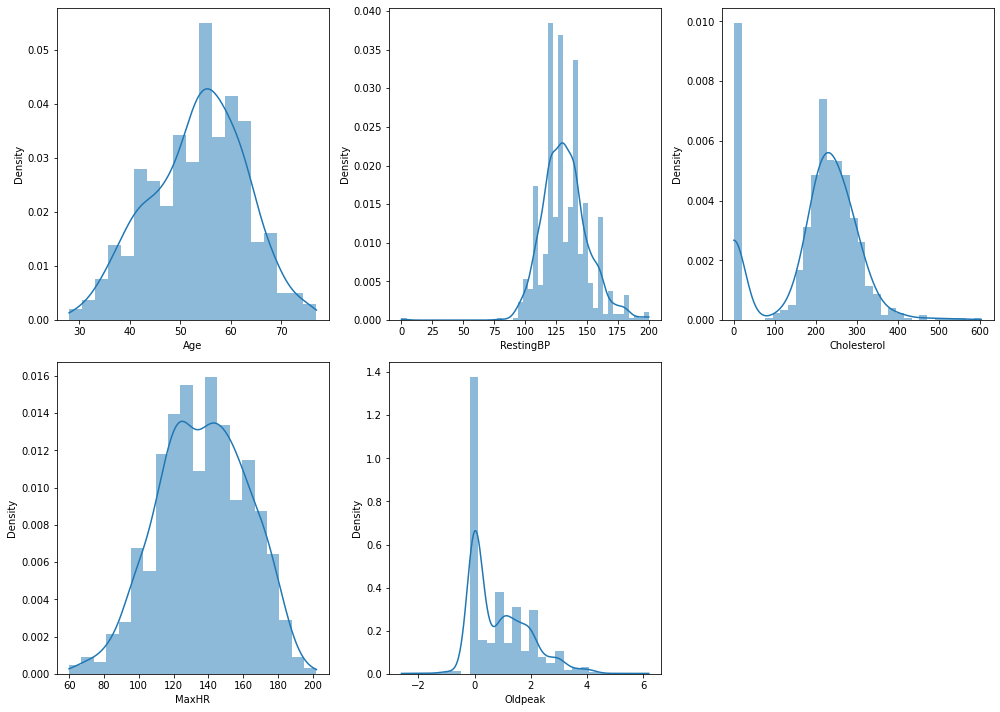

In [195]:
# DISTPLOT
cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
n = 1
plt.figure(figsize=(14, 10))
for col in cols:
    plt.subplot(2, 3, n)
    n += 1
    sns.histplot(df_heart[col], kde=True, stat="density", linewidth=0)
plt.tight_layout()
plt.show()

<AxesSubplot:>

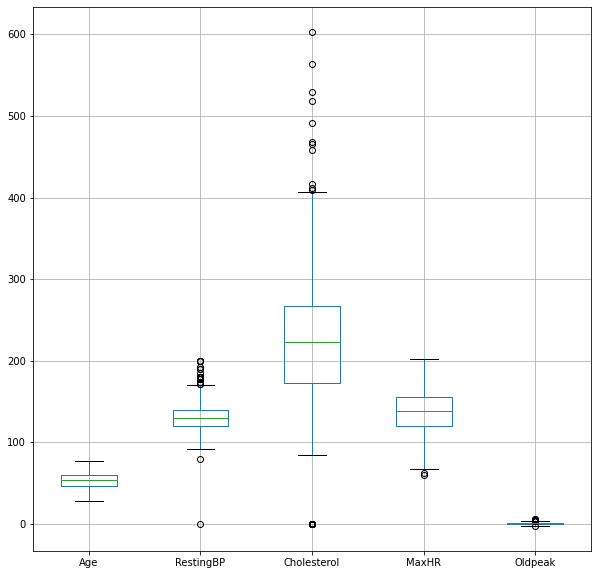

In [166]:
# boxplot : untuk melihat mean, outlier dari data numerik
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df_heart.boxplot(ax = ax,column=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

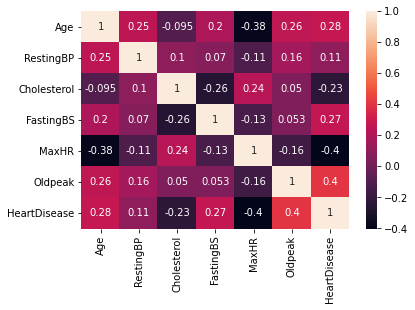

In [9]:
# heatmap : untuk melihat korelasi antar kolom
corr = df_heart.corr(method ='pearson') # 'pearson', 'spearman', 'kendall'
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

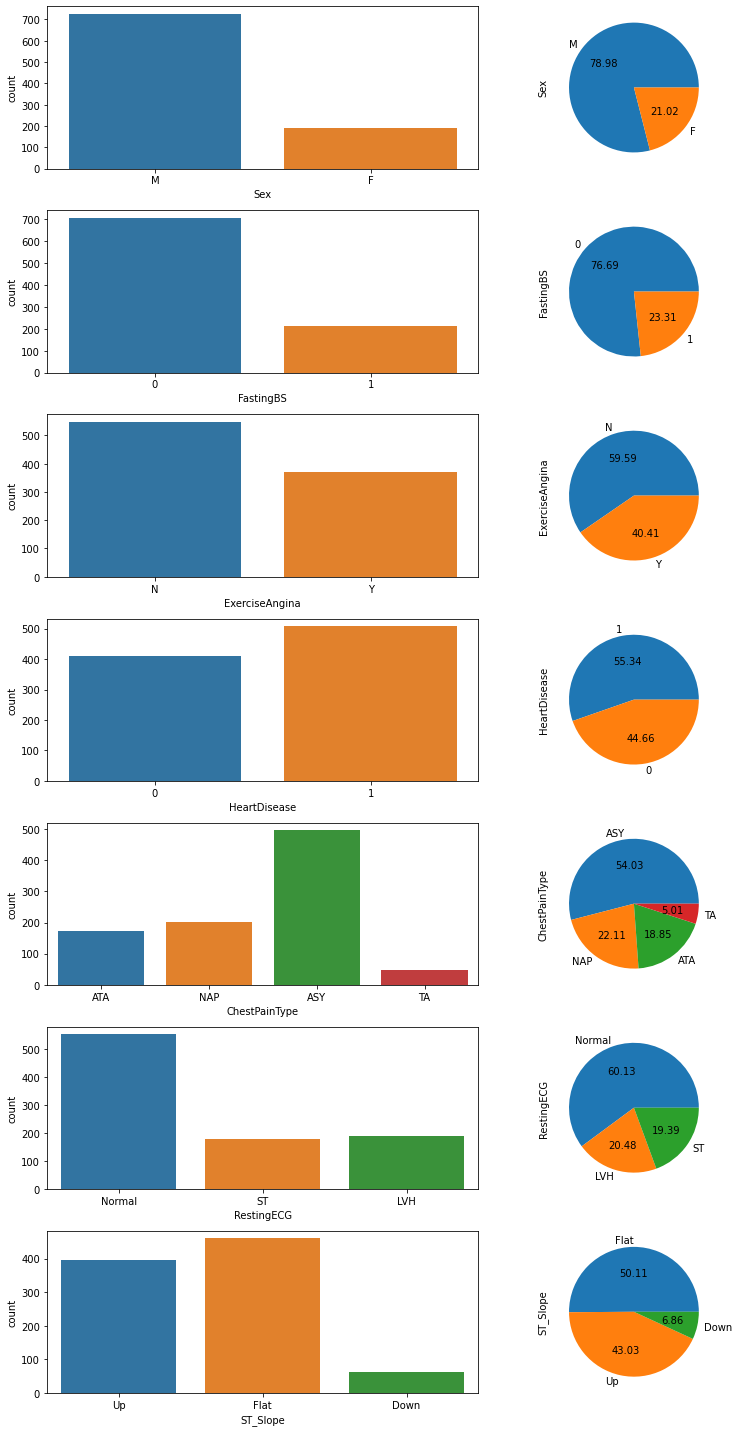

In [115]:
# Visualisasi Categorical Data
bool_categorical_cols = ['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease', 'ChestPainType', 'RestingECG', 'ST_Slope']
n = 1
plt.figure(figsize=(12, 20))
for col in bool_categorical_cols:
    plt.subplot(7,2,n)
    n += 1
    sns.countplot(x= df_heart[col])
    
    plt.subplot(7,2,n)
    n += 1
    df_heart[col].value_counts().plot(kind="pie", autopct="%.2f")
plt.tight_layout()
plt.show()

In [90]:
# Numerik dgn Numerik
# num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
# sns.scatterplot(df_heart[num_cols[2]], df_heart[num_cols[4]])

# parameter target (HeartDisease) merupakan Kategorikal jadi gk pake scatterplot
# kebanyakan relationshipnya sangat kecil
# https://chartio.com/learn/charts/what-is-a-scatter-plot/

Rata - Rata X untuk Sample Tanpa / Dengan HeartDisease


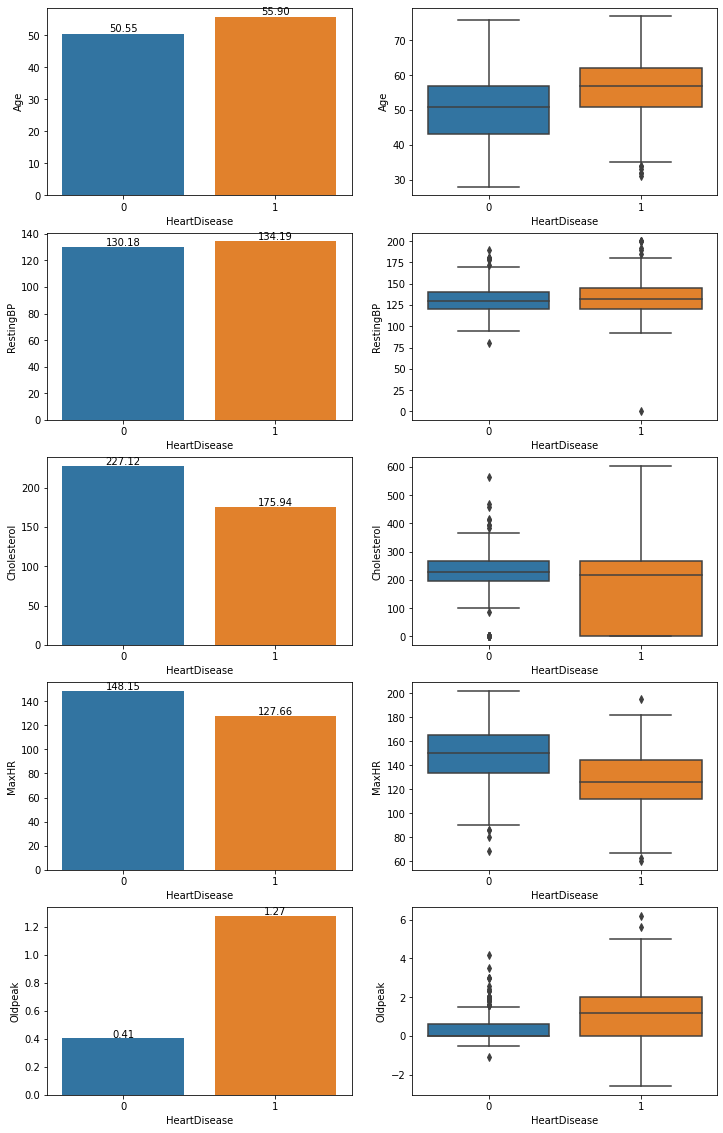

In [165]:
# Numerik dgn Kategorikal(HeartDisease)
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
n = 1

plt.figure(figsize=(12, 20))

for col in num_cols:
    plt.subplot(5,2,n)
    n += 1
    p = sns.barplot(x = df_heart['HeartDisease'], y = df_heart[col], ci = None)
    show_values(p)
    
    plt.subplot(5,2,n)
    n += 1
    sns.boxplot(x = df_heart['HeartDisease'], y = df_heart[col])
    

print('Rata - Rata X untuk Sample Tanpa / Dengan HeartDisease')
plt.show()

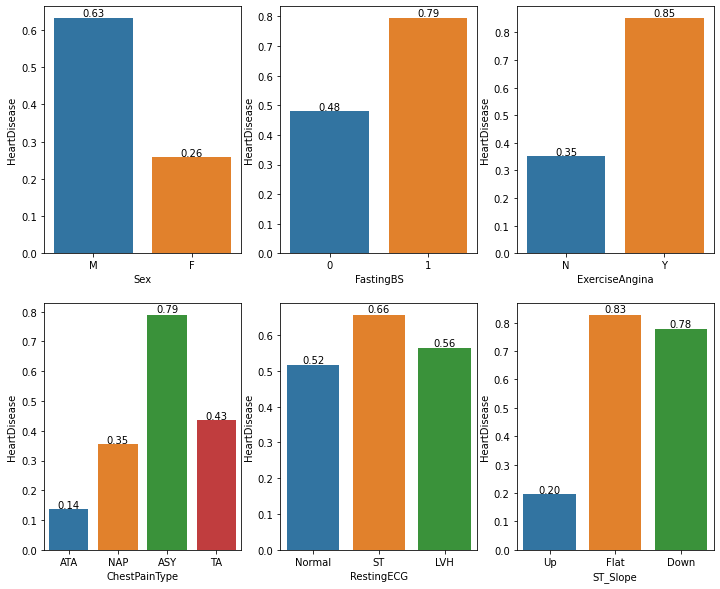

In [146]:
bool_categorical_cols = ['Sex', 'FastingBS', 'ExerciseAngina', 'ChestPainType', 'RestingECG', 'ST_Slope']
n = 1
plt.figure(figsize=(12, 10))
for col in bool_categorical_cols:
    plt.subplot(2,3,n)
    n+=1
    p = sns.barplot(x = df_heart[col], y = df_heart['HeartDisease'], ci=None)
    show_values(p)
plt.show()

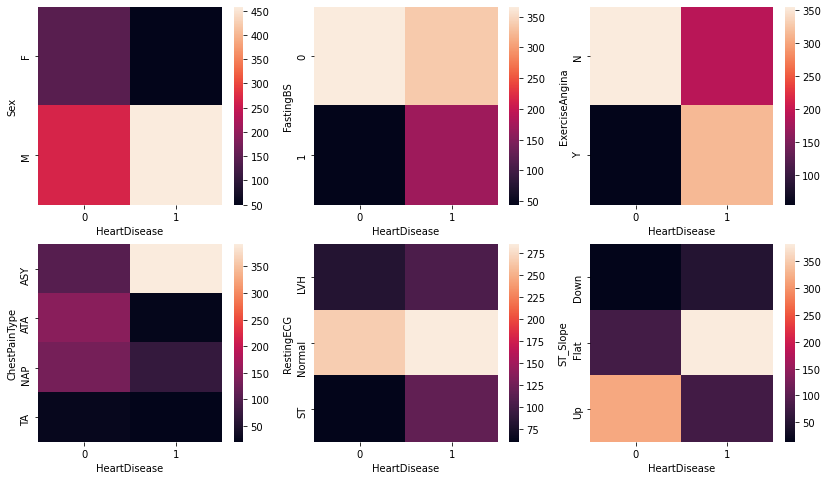

In [173]:
#heatmap
bool_categorical_cols = ['Sex', 'FastingBS', 'ExerciseAngina', 'ChestPainType', 'RestingECG', 'ST_Slope']
n = 1
plt.figure(figsize=(14, 8))
for col in bool_categorical_cols:
    ct = pd.crosstab(df_heart[col], df_heart['HeartDisease'])
#     print(ct)
    plt.subplot(2,3,n)
    n+=1
    sns.heatmap(ct)

#### b.	Apa pra-proses yg cocok dilakukan untuk dataset tersebut.

In [12]:
# Praproses

# penyesuaian tipe data : mengubah kolom  1/0 dengan boolean
bool_cols = ['FastingBS', 'HeartDisease']
for col in bool_cols:
    df_heart[col] = df_heart[col].astype('bool')
# ['N', 'Y'] -> [False, True]
df_heart['ExerciseAngina'] = (df_heart['ExerciseAngina'] == 'Y')
print(df_heart.dtypes)

# penyesuaian tipe data : mengubah kolom kategorikal dengan value numeriknya
df_heart['Sex'] = df_heart['Sex'].astype('category')
df_heart['RestingECG'] = df_heart['RestingECG'].astype('category')
df_heart['ChestPainType'] = df_heart['ChestPainType'].astype('category')
df_heart['ST_Slope'] = df_heart['ST_Slope'].astype('category')

cat_columns = df_heart.select_dtypes(['category']).columns
df_heart[cat_columns] = df_heart[cat_columns].apply(lambda x: x.cat.codes)


# memperbaiki kolom kolesterol dengan nilai 0 menggunakan mean / median (jika ada outlier). *test 293
df_heart.loc[df_heart['Cholesterol'] == 0, 'Cholesterol'] = df_heart['Cholesterol'].median()

# normalisasi
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

df_num = df_heart[num_cols].copy()
df_num = min_max_scaler(df_num)

for col in num_cols:
    df_heart[col] = df_num[col]

print(df_heart)


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS            bool
RestingECG         object
MaxHR               int64
ExerciseAngina       bool
Oldpeak           float64
ST_Slope           object
HeartDisease         bool
dtype: object
          Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0    0.244898    1              1       0.70     0.393822      False   
1    0.428571    0              2       0.80     0.183398      False   
2    0.183673    1              1       0.65     0.382239      False   
3    0.408163    0              0       0.69     0.249035      False   
4    0.530612    1              2       0.75     0.212355      False   
..        ...  ...            ...        ...          ...        ...   
913  0.346939    1              3       0.55     0.345560      False   
914  0.816327    1              0       0.72     0.208494       True   
915  0.591837    1        

#### c. Pilih dua metode pembagian data. Kemudian jelaskan alasan menggunakan metode tersebut.

In [13]:
# https://www.pluralsight.com/guides/validating-machine-learning-models-scikit-learn
# metode (train, test)
X = df_heart.drop(['HeartDisease'],axis=1).values
y = df_heart['HeartDisease'].values

# Split validasi (train 20%, test 20%)
X_train_sv, X_test_sv, y_train_sv, y_test_sv = train_test_split(X, y, test_size=0.2, random_state=1)

# metode holdout (train 60%, val 20%, test 20%)
X_train_ho, X_test_ho, y_train_ho, y_test_ho = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_ho, X_validation_ho, y_train_ho, y_validation_ho = train_test_split(X_train_ho, y_train_ho, test_size=0.25, random_state=1)

# cross validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# # https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/
# kf = KFold(n_splits=5, random_state=1) 

# for train_index, test_index in kf.split(X):
#       print("Train:", train_index, "Validation:",test_index)
#       X_train, X_test = X[train_index], X[test_index] 
#       y_train, y_test = y[train_index], y[test_index]

# https://vitalflux.com/k-fold-cross-validation-python-example/

Train: [184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309
 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327
 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345
 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363
 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381
 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399
 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 424 425 426 427 428

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


#### d. Pilih dua metode klasifikasi data. Kemudian jelaskan alasan menggunakan metode tersebut.

In [128]:
# klasifikasi data

# Karena data nya merupakan mixed (kategorikal dan numerik) 
# maka teknik yang dipakai adalah decision tree dan DT dengan ensemble (RF)

# Dengan Split Validation

# metode RF
# https://www.datacamp.com/community/tutorials/random-forests-classifier-python
clf_RF = RandomForestClassifier(n_estimators=100)
clf_RF = clf_RF.fit(X_train,y_train)
y_pred_RF = clf_RF.predict(X_test)

# metode CART
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
clf_DT = DecisionTreeClassifier()
clf_DT = clf_DT.fit(X_train,y_train)
y_pred_DT = clf_DT.predict(X_test)

# metode NB
# https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
clf_NB = GaussianNB()
clf_NB = clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_test)

# metode KNN
# https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN = clf_KNN.fit(X_train, y_train)
y_pred_KNN = clf_KNN.predict(X_test)

# Adaboost
clf_AdaB = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", 
                                  n_estimators=50, random_state = 1)
clf_AdaB= boosted_tree.fit(X_train, y_train)
y_pred_AdaB = clf_AdaB.predict(X_test)


# Dengan 10-Fold Cross Validation
# metode RF
accuracy_RF = cross_val_score(clf_RF, X_train, y_train, scoring='accuracy', cv=cv)
precision_RF = cross_val_score(clf_RF, X_train, y_train, scoring='precision', cv=cv)
recall_RF = cross_val_score(clf_RF, X_train, y_train, scoring='recall', cv=cv)

# metode CART
accuracy_DT = cross_val_score(clf_DT, X_train, y_train, scoring='accuracy', cv=cv)
precision_DT = cross_val_score(clf_DT, X_train, y_train, scoring='precision', cv=cv)
recall_DT = cross_val_score(clf_DT, X_train, y_train, scoring='recall', cv=cv)

# metode NB
accuracy_NB = cross_val_score(clf_NB, X_train, y_train, scoring='accuracy', cv=cv)
precision_NB = cross_val_score(clf_NB, X_train, y_train, scoring='precision', cv=cv)
recall_NB = cross_val_score(clf_NB, X_train, y_train, scoring='recall', cv=cv)

# metode KNN
accuracy_KNN = cross_val_score(clf_KNN, X_train, y_train, scoring='accuracy', cv=cv)
precision_KNN = cross_val_score(clf_KNN, X_train, y_train, scoring='precision', cv=cv)
recall_KNN = cross_val_score(clf_KNN, X_train, y_train, scoring='recall', cv=cv)

# Adaboost
accuracy_AdaB = cross_val_score(clf_AdaB, X_train, y_train, scoring='accuracy', cv=cv)
precision_AdaB = cross_val_score(clf_AdaB, X_train, y_train, scoring='precision', cv=cv)
recall_AdaB = cross_val_score(clf_AdaB, X_train, y_train, scoring='recall', cv=cv)


C:\Users\ACER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### e.	Hitung nilai akurasi, presisi, recall.

In [131]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

# Split Validasi
print('Split Validasi')
print('Random Forest (RF)')
# akurasi
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred_RF))
# presisi 
print("Presisi RF:",metrics.precision_score(y_test, y_pred_RF))
# recall
print("Recall RF:",metrics.recall_score(y_test, y_pred_RF))

print('Decision Tree (CART)')
# akurasi
print("Accuracy DT:",metrics.accuracy_score(y_test, y_pred_DT))
# presisi 
print("Presisi DT:",metrics.precision_score(y_test, y_pred_DT))
# recall
print("Recall DT:",metrics.recall_score(y_test, y_pred_DT))

print('Naive Bayes (NB)')
# akurasi
print("Accuracy NB:",metrics.accuracy_score(y_test, y_pred_NB))
# presisi 
print("Presisi NB:",metrics.precision_score(y_test, y_pred_NB))
# recall
print("Recall NB:",metrics.recall_score(y_test, y_pred_NB))

print('K-Nearest Neighbor (KNN)')
# akurasi
print("Accuracy KNN:",metrics.accuracy_score(y_test, y_pred_KNN))
# presisi 
print("Presisi KNN:",metrics.precision_score(y_test, y_pred_KNN))
# recall
print("Recall KNN:",metrics.recall_score(y_test, y_pred_KNN))

print('AdaBoost (AdaB)')
# akurasi
print("Accuracy AdaB:",metrics.accuracy_score(y_test, y_pred_AdaB))
# presisi 
print("Presisi AdaB:",metrics.precision_score(y_test, y_pred_AdaB))
# recall
print("Recall AdaB:",metrics.recall_score(y_test, y_pred_AdaB))

# 10-Fold Cross Validation
print('\n10-Fold Cross Validation')
print('Random Forest (RF)')
# akurasi
print("Accuracy RF:",np.mean(accuracy_RF))
# presisi 
print("Presisi RF:",np.mean(precision_RF))
# recall
print("Recall RF:",np.mean(recall_RF))

print('Decision Tree (CART)')
# akurasi
print("Accuracy DT:",np.mean(accuracy_DT))
# presisi 
print("Presisi DT:",np.mean(precision_DT))
# recall
print("Recall DT:",np.mean(recall_DT))

print('Naive Bayes (NB)')
# akurasi
print("Accuracy NB:",np.mean(accuracy_NB))
# presisi 
print("Presisi NB:",np.mean(precision_NB))
# recall
print("Recall NB:",np.mean(recall_NB))

print('K-Nearest Neighbor (KNN)')
# akurasi
print("Accuracy KNN:",np.mean(accuracy_KNN))
# presisi 
print("Presisi KNN:",np.mean(precision_KNN))
# recall
print("Recall KNN:",np.mean(recall_KNN))

print('AdaBoost (AdaB)')
# akurasi
print("Accuracy AdaB:",np.mean(accuracy_AdaB))
# presisi 
print("Presisi AdaB:",np.mean(precision_AdaB))
# recall
print("Recall AdaB:",np.mean(recall_AdaB))

Split Validasi
Random Forest (RF)
Accuracy RF: 0.8478260869565217
Presisi RF: 0.8705035971223022
Recall RF: 0.8768115942028986
Decision Tree (CART)
Accuracy DT: 0.7347826086956522
Presisi DT: 0.808
Recall DT: 0.7318840579710145
Naive Bayes (NB)
Accuracy NB: 0.8217391304347826
Presisi NB: 0.8592592592592593
Recall NB: 0.8405797101449275
K-Nearest Neighbor (KNN)
Accuracy KNN: 0.8173913043478261
Presisi KNN: 0.8287671232876712
Recall KNN: 0.8768115942028986
AdaBoost (AdaB)
Accuracy AdaB: 0.8043478260869565
Presisi AdaB: 0.8297872340425532
Recall AdaB: 0.8478260869565217

10-Fold Cross Validation
Random Forest (RF)
Accuracy RF: 0.8677323103154304
Presisi RF: 0.8583481432945564
Recall RF: 0.8784937795599561
Decision Tree (CART)
Accuracy DT: 0.786381074168798
Presisi DT: 0.7945196699312553
Recall DT: 0.7908225487637253
Naive Bayes (NB)
Accuracy NB: 0.831457800511509
Presisi NB: 0.8531887518284578
Recall NB: 0.8283433377918671
K-Nearest Neighbor (KNN)
Accuracy KNN: 0.8460571184995735
Presisi 

In [ ]:
# end